# ERA/MODIS joining

This notebook provides a worked example of how to link ERA5 reanalysis data with real-world MODIS observations in both time and space.

# 1. ERA5

The ERA5 data is on a reduced Gaussian grid, N320. 

We have the ERA data in monthly files.

For this NB, we will just load a single month:

In [43]:
import xarray as xr
ERA = '/network/group/aopp/predict/TIP016_PAXTON_RPSPEEDY/ML4L/ECMWF_files/sfc_unstructured_2018_01.grib'
ds_ERA = xr.open_dataset(ERA, engine="cfgrib")

In [44]:
ds_ERA

<xarray.Dataset>
Dimensions:     (time: 744, values: 542080)
Coordinates:
    number      int64 ...
  * time        (time) datetime64[ns] 2018-01-01 ... 2018-01-31T23:00:00
    step        timedelta64[ns] ...
    surface     float64 ...
    latitude    (values) float64 ...
    longitude   (values) float64 ...
    valid_time  (time) datetime64[ns] ...
Dimensions without coordinates: values
Data variables:
    sp          (time, values) float32 ...
    msl         (time, values) float32 ...
    u10         (time, values) float32 ...
    v10         (time, values) float32 ...
    t2m         (time, values) float32 ...
Attributes:
    GRIB_edition:            1
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2022-01-18T13:25 GRIB to CDM+CF via cfgrib-0.9.9...

We have 744 time values (24 hrs x 31 days) and 542080 grid points on reduced GG.

The longitude is in the `long3` format.

Lets tidy this up by converting `long3` to `long1` and reindexing onto a latitude/longtiude/time grain. We will also rename latitude/longitude to y/x

*We have done this in pandas as it seems a bit more straightforward. Would it be better to stick to native `xarray` methods?*



In [45]:
df_ERA = ds_ERA.to_dataframe() #Convert to a pandas df
df_ERA['long1'] = (df_ERA['longitude'] +180.0) %360.0 - 180.0 #Calculate long1 from long3
df_ERA = df_ERA.reset_index().set_index(['latitude','long1', 'time']) #Reindex
df_ERA = df_ERA.rename_axis(['y','x','time']) #Rename


In [46]:
display(df_ERA)

values  number   step  surface  \
y          x      time                                                  
 89.784877  0.0   2018-01-01 00:00:00       0       0 0 days      0.0   
            20.0  2018-01-01 00:00:00       1       0 0 days      0.0   
            40.0  2018-01-01 00:00:00       2       0 0 days      0.0   
            60.0  2018-01-01 00:00:00       3       0 0 days      0.0   
            80.0  2018-01-01 00:00:00       4       0 0 days      0.0   
...                                       ...     ...    ...      ...   
-89.784877 -100.0 2018-01-31 23:00:00  542075       0 0 days      0.0   
           -80.0  2018-01-31 23:00:00  542076       0 0 days      0.0   
           -60.0  2018-01-31 23:00:00  542077       0 0 days      0.0   
           -40.0  2018-01-31 23:00:00  542078       0 0 days      0.0   
           -20.0  2018-01-31 23:00:00  542079       0 0 days      0.0   

                                       longitude          valid_time  \
y          x      time                                                 
 89.784877  0.0   2018-01-01 00:00:00        0.0 2018-01-01 00:00:00   
            20.0  2018-01-01 00:00:00       20.0 2018-01-01 00:00:00   
            40.0  2018-01-01 00:00:00       40.0 2018-01-01 00:00:00   
            60.0  2018-01-01 00:00:00       60.0 2018-01-01 00:00:00   
            80.0  2018-01-01 00:00:00       80.0 2018-01-01 00:00:00   
...                                          ...                 ...   
-89.784877 -100.0 2018-01-31 23:00:00      260.0 2018-01-31 23:00:00   
           -80.0  2018-01-31 23:00:00      280.0 2018-01-31 23:00:00   
           -60.0  2018-01-31 23:00:00      300.0 2018-01-31 23:00:00   
           -40.0  2018-01-31 23:00:00      320.0 2018-01-31 23:00:00   
           -20.0  2018-01-31 23:00:00      340.0 2018-01-31 23:00:00   

                                                  sp          msl       u10  \
y          x      time                                                        
 89.784877  0.0   2018-01-01 00:00:00  100755.093750  100762.5625 -0.935425   
            20.0  2018-01-01 00:00:00  100749.093750  100758.3125 -1.751831   
            40.0  2018-01-01 00:00:00  100749.093750  100756.3125 -2.422729   
            60.0  2018-01-01 00:00:00  100753.093750  100756.8125 -2.851440   
            80.0  2018-01-01 00:00:00  100757.093750  100759.3125 -2.934448   
...                                              ...          ...       ...   
-89.784877 -100.0 2018-01-31 23:00:00   69498.984375  100997.0000 -0.711578   
           -80.0  2018-01-31 23:00:00   69564.984375  100998.7500 -1.514313   
           -60.0  2018-01-31 23:00:00   69592.984375  100996.2500 -2.208649   
           -40.0  2018-01-31 23:00:00   69567.984375  100989.2500 -2.626617   
           -20.0  2018-01-31 23:00:00   69492.984375  100976.7500 -2.634430   

                                            v10         t2m  
y          x      time                                       
 89.784877  0.0   2018-01-01 00:00:00 -2.698105  252.392105  
            20.0  2018-01-01 00:00:00 -2.205917  252.413589  
            40.0  2018-01-01 00:00:00 -1.483261  252.403824  
            60.0  2018-01-01 00:00:00 -0.545761  252.353043  
            80.0  2018-01-01 00:00:00  0.523575  252.267105  
...                                         ...         ...  
-89.784877 -100.0 2018-01-31 23:00:00  2.167465  239.008270  
           -80.0  2018-01-31 23:00:00  1.830551  239.051239  
           -60.0  2018-01-31 23:00:00  1.181137  239.049286  
           -40.0  2018-01-31 23:00:00  0.261215  238.996552  
           -20.0  2018-01-31 23:00:00 -0.797379  238.980927  

[403307520 rows x 11 columns]

# 2. MODIS

This is MODIS data obtained from [Google Earth Engine](https://developers.google.com/earth-engine/datasets/catalog/MODIS_006_MYD11A1), having undergone some processing. 

It is the `MYD11A1.006` product. Note that `MYD` refers to Aqua/MODIS (c.f. Terra). 

The corresponding dataset can also be found in the [datapool](https://lpdaac.usgs.gov/products/myd11a1v006/).

It is a level 3 product, derived from the [level 2 swath product](https://lpdaac.usgs.gov/products/myd11_l2v006/).

It is also a version 6.0 product - [newer 6.1 products do exist](https://lpdaac.usgs.gov/news/upcoming-release-lp-daac-modis-version-61-data-products/)

See [here](https://modaps.modaps.eosdis.nasa.gov/services/about/nomenclature.html) for some nomenclature, and also check out the [Users's guide](https://lpdaac.usgs.gov/documents/118/MOD11_User_Guide_V6.pdf)

The MODIS data is on a regular grid 5400 x 10800 lat/long.

We have the MODIS data in daily files. For this NB we will just load 1 day of data:

In [47]:
MODIS = '/network/group/aopp/predict/TIP016_PAXTON_RPSPEEDY/ML4L/ECMWF_files/terraDayTime_errorGTE03K_04km_2018-01-01.tif'
ds_MODIS =  xr.open_rasterio(MODIS)

The MODIS data needs to undergo some additional processing in order to be able to link it in time/space to the ERA5 data.

* We need the actual **date** of observation. We know this from the file name, but it is not included as e.g. an attribute in the ds

* We need to correct the local solar time for scaling factors

* We need to convert to local solar time to an absolute UTC.

* We need to combine UTC and date for a single datetime stamp, rounded to the nearest hour

In [48]:
import pandas as pd
def process_MODIS_data(f):
    """Open xarray ds, convert to pandas df and make some corrections"""
    
    #Open
    ds = xr.open_rasterio(f)
    

    
    #Turn it into a df, and make some basic corrections
    df = ds.to_dataframe(name='local_solar_time_uncorrected')
    
    #Correct local solar time and calculate UTC
    df['local_solar_time'] = df['local_solar_time_uncorrected']/0.02*0.1 #scaling
    df['UTC'] = df['local_solar_time'] - df.index.get_level_values('x')/15.0 #Correct LST to UTC
    
    
    #---Dates
    #Get the date from string name
    date_string =f.split('_')[-1].split('.')[0].replace('-','')
    date = pd.to_datetime(date_string, format='%Y%m%d')
    df['date'] = date_string
    
    #Get a datetime by combining date and UTC, and round to hours
    df['timeUTC'] = date + pd.to_timedelta(df['UTC'], unit='h') 
    df['time']=df['timeUTC'].dt.round('H')
    
    out = df.reset_index().set_index(['y', 'x', 'time'],drop=True) #reindex()
    return out
    

In [49]:
df_MODIS = process_MODIS_data(MODIS)

In [50]:
display(df_MODIS)

band  \
y          x           time                        
 89.983333 -179.983333 NaT                     1   
           -179.950000 NaT                     1   
           -179.916667 NaT                     1   
           -179.883333 NaT                     1   
           -179.850000 NaT                     1   
...                                          ...   
-89.983333  179.850000 2017-12-31 23:00:00     1   
            179.883333 2017-12-31 23:00:00     1   
            179.916667 2017-12-31 23:00:00     1   
            179.950000 2017-12-31 23:00:00     1   
            179.983333 2017-12-31 23:00:00     1   

                                            local_solar_time_uncorrected  \
y          x           time                                                
 89.983333 -179.983333 NaT                                           NaN   
           -179.950000 NaT                                           NaN   
           -179.916667 NaT                                           NaN   
           -179.883333 NaT                                           NaN   
           -179.850000 NaT                                           NaN   
...                                                                  ...   
-89.983333  179.850000 2017-12-31 23:00:00                      2.186667   
            179.883333 2017-12-31 23:00:00                      2.186667   
            179.916667 2017-12-31 23:00:00                      2.186667   
            179.950000 2017-12-31 23:00:00                      2.186667   
            179.983333 2017-12-31 23:00:00                      2.186667   

                                            local_solar_time       UTC  \
y          x           time                                              
 89.983333 -179.983333 NaT                               NaN       NaN   
           -179.950000 NaT                               NaN       NaN   
           -179.916667 NaT                               NaN       NaN   
           -179.883333 NaT                               NaN       NaN   
           -179.850000 NaT                               NaN       NaN   
...                                                      ...       ...   
-89.983333  179.850000 2017-12-31 23:00:00         10.933334 -1.056666   
            179.883333 2017-12-31 23:00:00         10.933334 -1.058889   
            179.916667 2017-12-31 23:00:00         10.933334 -1.061111   
            179.950000 2017-12-31 23:00:00         10.933334 -1.063333   
            179.983333 2017-12-31 23:00:00         10.933334 -1.065555   

                                                date  \
y          x           time                            
 89.983333 -179.983333 NaT                  20180101   
           -179.950000 NaT                  20180101   
           -179.916667 NaT                  20180101   
           -179.883333 NaT                  20180101   
           -179.850000 NaT                  20180101   
...                                              ...   
-89.983333  179.850000 2017-12-31 23:00:00  20180101   
            179.883333 2017-12-31 23:00:00  20180101   
            179.916667 2017-12-31 23:00:00  20180101   
            179.950000 2017-12-31 23:00:00  20180101   
            179.983333 2017-12-31 23:00:00  20180101   

                                                                 timeUTC  
y          x           time                                               
 89.983333 -179.983333 NaT                                           NaT  
           -179.950000 NaT                                           NaT  
           -179.916667 NaT                                           NaT  
           -179.883333 NaT                                           NaT  
           -179.850000 NaT                                           NaT  
...                                                                  ...  
-89.983333  179.850000 2017-12-31 23:00:00 2017-12-31 22:56:36.001086000  
           

The NaNs are just coordinates where we do not have any data at this time. Note that this MODIS file we are using doesnt actually have any "values" i.e. surface temperature readings - for now we are just interested in time/space columns since we are focused on the linking. 

We also have some UTC observation times that are not actually for the listed day i..e we have some late observations on 31st Dec, not just 1st Jan. When transforming this into a pipeline we will need to take account of this 

# 3. Combining
Before going further lets  save these processed dfs to disk: 


In [52]:
base = '/network/group/aopp/predict/TIP016_PAXTON_RPSPEEDY/ML4L/ERA_MODIS/'
df_ERA.to_pickle(base+'ERA_processed.pkl')
df_MODIS.to_pickle(base+'MODIS_processed.pkl')


...and these can be reloaded at any point as:

In [53]:
df_ERA_processed = pd.read_pickle(base+'ERA_processed.pkl')
df_MODIS_processed = pd.read_pickle(base+'MODIS_processed.pkl')

We have the ERA data over a month and the MODIS data over a ~day.

**ERA** &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; **MODIS**

[-----------]  [-----------] \
[-----------] \
[-----------] \
[-----------] \
[-----------] \
...




Lets do a snaptshot of the ERA data also on 1 day.

**ERA** &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; **MODIS**

[-----------]  [-----------] 


In [54]:
df_ERA_day = df_ERA_processed.query('time < "2018-01-02 00:00:00"')

And then separate each of our 'day' products into 24 'hour' products

**ERA** &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; **MODIS**

[-----------]  [-----------] \
1,2,3,4,... &nbsp; &nbsp; &nbsp; &nbsp; 1,2,3,4,...


In [55]:
#It is convinient to first reset the index
df_ERA_day = df_ERA_day.reset_index()
df_MODIS_processed = df_MODIS_processed.reset_index()

In [56]:
#Get a list of unique times
unique_times = df_ERA_day.time.unique()

#Separate 24hr df into collection of dfs, each for 1 hour
dfs24_ERA   = [df_ERA_day[df_ERA_day['time'] == s] for s in unique_times]
dfs24_MODIS = [df_MODIS_processed[df_MODIS_processed['time'] == s] for s in unique_times]

We can then select a single hour of data

**ERA** &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; **MODIS**

[-----------]  [-----------] \
1 &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; 1

In [57]:
i=0
ERA1 = dfs24_ERA[i]
MODIS1 = dfs24_MODIS[i]


Lets have a quick look at what each of these datasets look like:

In [58]:
import geopandas as gpd
from geopandas import GeoDataFrame
from shapely.geometry import Point
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

def plot_world_map(df,q):
    #Plot land outlines
    ax=world.boundary.plot(figsize=(24,12))

    #Create geopandas
    geometry = [Point(xy) for xy in zip(df['x'], df['y'])]
    gdf = GeoDataFrame(df, geometry=geometry)   

    #Plot it
    gdf.plot(ax=ax,column=q, cmap='plasma', legend=True,markersize=1)
    

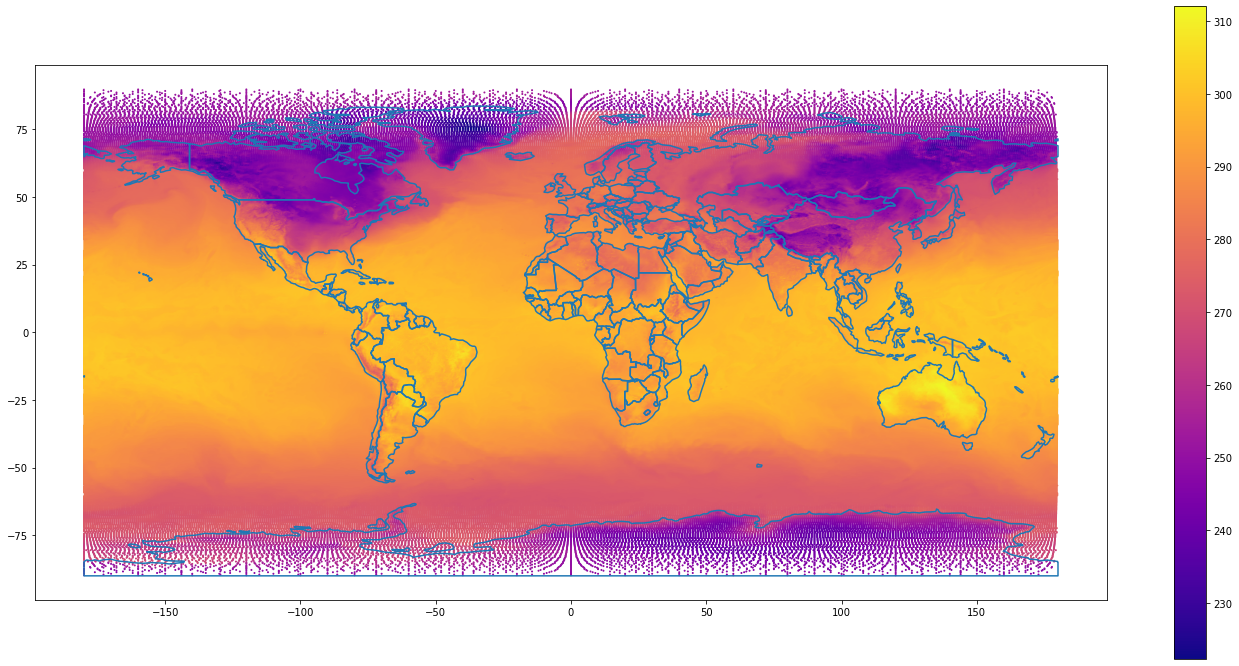

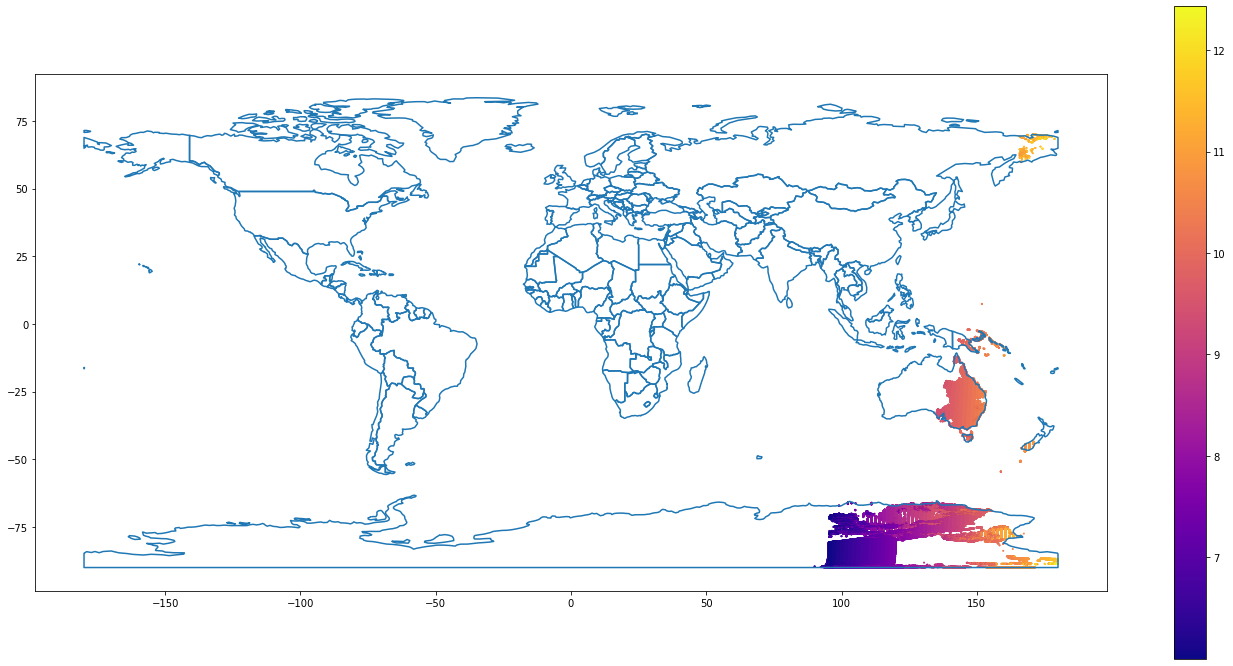

In [59]:
plot_world_map(ERA1, 't2m')
plot_world_map(MODIS1,'local_solar_time')

The ERA data covers the global surface, whilst the MODIS data only covers a subset - the points MODIS was able to observe within that hour.


---


Now, for every entry in `ERA1` we want to find the closest entry in `MODIS1`. This is a classic [nearest neighbours problem](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.neighbors) which we can solve with inbuilt functions. We use the Haversine distance as our closeness metric. 

**This search is currently our most demanding step. How can we reduce this demand? No need to look in the entire ERA set...We could also potentially use query_radius...**

In [60]:
%%time

from sklearn.neighbors import BallTree
import numpy as np

# Setup Balltree using MODIS as reference dataset
# Use Haversine calculate distance between points on the earth from lat/long
tree = BallTree(np.deg2rad(MODIS1[['y', 'x']].values), metric='haversine')

# Setup distance queries (points for which we want to find nearest neighbors)
query_lats = ERA1['y'].astype(np.float64)
query_lons = ERA1['x'].astype(np.float64)

# For each entry in ERA1, find closest value in MODIS1
distances, indices = tree.query(np.deg2rad(np.c_[query_lats, query_lons]), k = 1) #k nearest neighbours

r_km = 6371 # multiplier to convert to km (from unit distance)
distances = distances*r_km



CPU times: user 1min 35s, sys: 627 ms, total: 1min 36s
Wall time: 1min 36s


The `i`th entry in `ERA1` is paired with the `j = indices[i]`th entry in MODIS1, with a distance separating the two points of `distances[i]`

Clearly since an hour of MODIS data only convers a small area of the total Earth there will be many points that are 'matched' as closest neighbours, but in reality they are too far apart 

### Example:


In [61]:
i = 100

print('ERA row entry:')
display(ERA1.iloc[i].to_frame().T)
j = indices[i]

print('MODIS row entry:')
display(MODIS1.iloc[j])

print('Distance between "matched" points (km):',distances[i][0])


ERA row entry:


y      x       time values number   step surface longitude  \
100  88.945191 -171.0 2018-01-01    100      0 0 days     0.0     189.0   

    valid_time            sp          msl       u10       v10         t2m  \
100 2018-01-01  100863.09375  100870.3125  3.409302  2.895645  251.261246   

                           geometry  
100  POINT (-171 88.94519111831644)

MODIS row entry:


y           x       time  band  local_solar_time_uncorrected  \
6468933  70.05  171.116667 2018-01-01     1                         2.216   

         local_solar_time       UTC      date                       timeUTC  \
6468933             11.08 -0.327777  20180101 2017-12-31 23:40:20.001442800   

                           geometry  
6468933  POINT (171.11667 70.05000)

Distance between "matched" points (km): 2107.0117089793007


Whilst others are close together and are a good match e.g. 

In [62]:
i = 525145

print('ERA row entry:')
display(ERA1.iloc[i].to_frame().T)
j = indices[i]

print('MODIS row entry:')
display(MODIS1.iloc[j])

print('Distance between "matched" points (km):',distances[i][0])

ERA row entry:


y       x       time  values number   step surface longitude  \
525145 -70.117048  110.25 2018-01-01  525145      0 0 days     0.0    110.25   

       valid_time           sp          msl       u10       v10         t2m  \
525145 2018-01-01  71891.09375  100004.8125 -4.750854  6.441544  250.446793   

                                 geometry  
525145  POINT (110.25 -70.11704774721858)

MODIS row entry:


y       x       time  band  local_solar_time_uncorrected  \
51881107 -70.116667  110.25 2018-01-01     1                       1.43375   

          local_solar_time      UTC      date                       timeUTC  \
51881107           7.16875 -0.18125  20180101 2017-12-31 23:49:07.500601200   

                             geometry  
51881107  POINT (110.25000 -70.11667)

Distance between "matched" points (km): 0.04237422401458435


### Tolerance cutoff

We want to impose some tolerance cutoff - we only have a 'match' in the ERA/MODIS coordinates if the distance is < $ \epsilon $.

Lets combine each ERA entry with the closest MODIS match and then filter by distance:

In [63]:

#Combine both dfs
df_combined = ERA1.join(MODIS1.iloc[indices.flatten()].reset_index(), lsuffix='_ERA',rsuffix='_MODIS')
df_combined['distance'] = distances
df_combined['MODIS_idx'] = indices

#Filter and surface selected columns
#We have set the cutoff arbitratily as 1
df_combined_matches = df_combined.query('distance < 1')
display(df_combined_matches)

y_ERA       x_ERA   time_ERA  values  number   step  surface  \
17794   69.554988  174.000000 2018-01-01   17794       0 0 days      0.0   
17795   69.554988  174.750000 2018-01-01   17795       0 0 days      0.0   
19235   68.711899  172.592593 2018-01-01   19235       0 0 days      0.0   
29045   63.653361  166.200000 2018-01-01   29045       0 0 days      0.0   
29048   63.653361  168.000000 2018-01-01   29048       0 0 days      0.0   
...           ...         ...        ...     ...     ...    ...      ...   
541973 -88.945191  108.000000 2018-01-01  541973       0 0 days      0.0   
541974 -88.945191  117.000000 2018-01-01  541974       0 0 days      0.0   
542067 -89.784877  100.000000 2018-01-01  542067       0 0 days      0.0   
542068 -89.784877  120.000000 2018-01-01  542068       0 0 days      0.0   
542069 -89.784877  140.000000 2018-01-01  542069       0 0 days      0.0   

         longitude valid_time            sp  ...  time_MODIS  band  \
17794   174.000000 2018-01-01  101772.09375  ...  2018-01-01     1   
17795   174.750000 2018-01-01  101106.09375  ...  2018-01-01     1   
19235   172.592593 2018-01-01  100103.09375  ...  2018-01-01     1   
29045   166.200000 2018-01-01   94673.09375  ...  2018-01-01     1   
29048   168.000000 2018-01-01  101471.09375  ...  2018-01-01     1   
...            ...        ...           ...  ...         ...   ...   
541973  108.000000 2018-01-01   67488.09375  ...  2018-01-01     1   
541974  117.000000 2018-01-01   67463.09375  ...  2018-01-01     1   
542067  100.000000 2018-01-01   69097.09375  ...  2018-01-01     1   
542068  120.000000 2018-01-01   69062.09375  ...  2018-01-01     1   
542069  140.000000 2018-01-01   69044.09375  ...  2018-01-01     1   

        local_solar_time_uncorrected  local_solar_time       UTC      date  \
17794                       2.230000         11.150000 -0.451111  20180101   
17795                       2.286667         11.433333 -0.216667  20180101   
19235                       2.237143         11.185714 -0.319842  20180101   
29045                       2.240000         11.200000  0.121111  20180101   
29048                       2.258750         11.293750  0.094861  20180101   
...                              ...               ...       ...       ...   
541973                      1.380000          6.900000 -0.301111  20180101   
541974                      1.590000          7.950000  0.151111  20180101   
542067                      1.342500          6.712500  0.082500  20180101   
542068                      1.520000          7.600000 -0.325556  20180101   
542069                      1.755000          8.775000 -0.499444  20180101   

                             timeUTC               geometry_MODIS  distance  \
17794  2017-12-31 23:32:56.000342400   POINT (174.01667 69.55000)  0.852543   
17795  2017-12-31 23:46:59.999368800   POINT (174.75000 69.55000)  0.554674   
19235  2017-12-31 23:40:48.570423600   POINT (172.58333 68.71667)  0.648649   
29045  2018-01-01 00:07:16.000172400   POINT (166.18333 63.65000)  0.903424   
29048  2018-01-01 00:05:41.499312000   POINT (167.98333 63.65000)  0.903424   
...                              ...                          ...       ...   
541973 2017-12-31 23:41:55.999914001  POINT (108.01667 -88.95000)  0.535806   
541974 2018-01-01 00:09:04.000600799  POINT (116.98333 -88.95000)  0.535806   
542067 2018-01-01 00:04:56.999485200   POINT (99.45000 -89.78333)  0.287338   
542068 2017-12-31 23:40:27.999656400  POINT (118.88333 -89.78333)  0.498351   
542069 2017-12-31 23:30:01.999915200  POINT (139.11667 -89.78333)  0.407964   

        MODIS_idx  
17794         150  
17795         151  
19235         398  
29045         721  
29048         725  
...           ...  
541973     601359  
541974     601628  
542067     618656  
542068     619093  
542069     619392  

[1025 rows x 28 columns]

<AxesSubplot:>

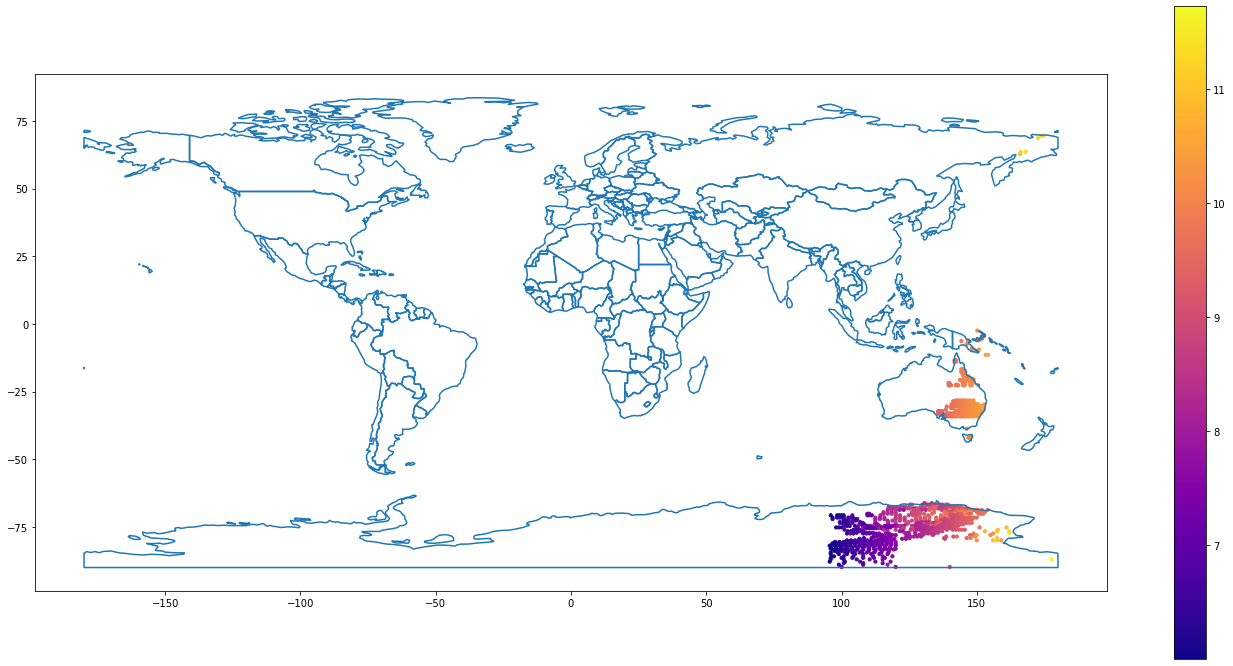

In [64]:
df = df_combined_matches
q = 'local_solar_time'
#Plot land outlines
ax=world.boundary.plot(figsize=(24,12))

#Create geopandas
geometry = [Point(xy) for xy in zip(df['x_ERA'], df['y_ERA'])]
gdf = GeoDataFrame(df, geometry=geometry)   

#Plot it
gdf.plot(ax=ax,column=q, cmap='plasma', legend=True,markersize=10)




This general process can then be repeated for each hour snapshot.

---

# 3.1 Combining, but faster

It seems wasteful to find matching points over the entire ERA set since we are going to end up culling most of them due to the tolerance cutoffs.

Lets impose a trivial requirement on the ERA1 set to be within the longitude limits set by the MODIS1 set:

In [65]:
string_query = 'x > %.9f & x < %.9f' % (min(MODIS1['x']),max(MODIS1['x']))
ERA1_selected = ERA1.query(string_query)

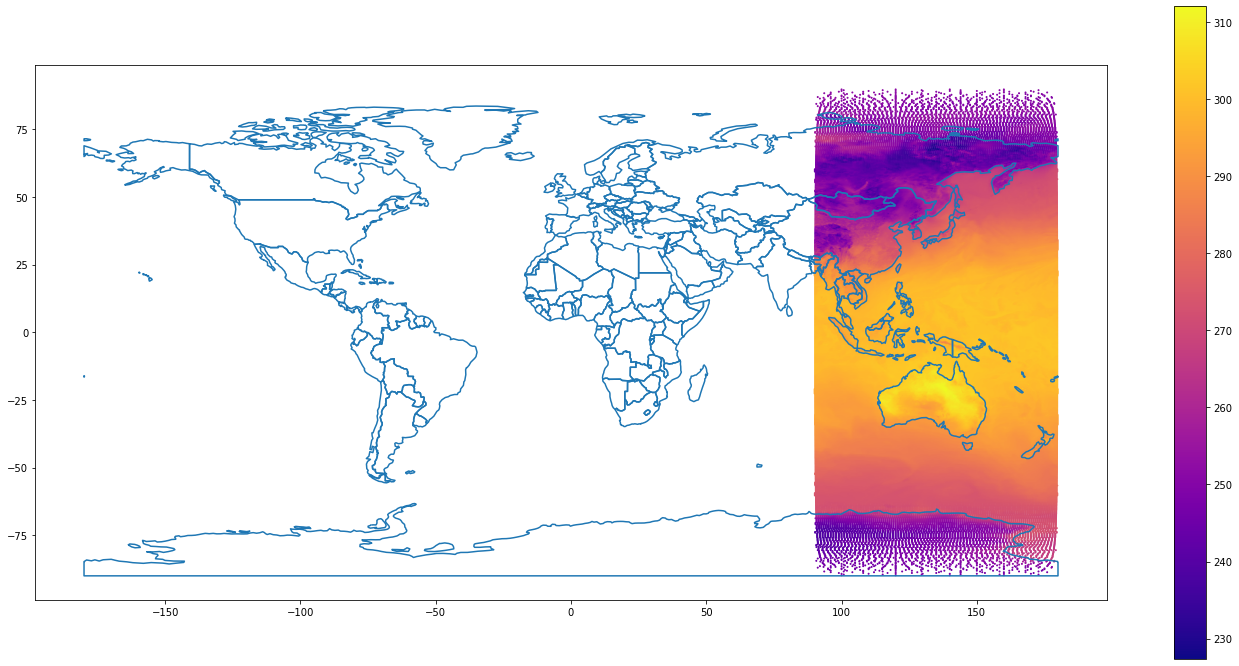

In [66]:
plot_world_map(ERA1_selected, 't2m')

We can also use a generalisation of the above Ball Tree method to let the computer choose the best NN algo for the set of data

In [67]:
%%time

from sklearn.neighbors import NearestNeighbors
import numpy as np

# Setup NearestNeighbours using MODIS as reference dataset
# Use Haversine calculate distance between points on the earth from lat/long
NN = NearestNeighbors(n_neighbors=1, metric='haversine') #algorithm = balltree, kdtree or brutie force


NN.fit(np.deg2rad(MODIS1[['y', 'x']].values))



query_lats = ERA1_selected['y'].astype(np.float64)
query_lons = ERA1_selected['x'].astype(np.float64)
X = np.deg2rad(np.c_[query_lats, query_lons])
distances, indices = NN.kneighbors(X, return_distance=True)


r_km = 6371 # multiplier to convert to km (from unit distance)
distances = distances*r_km





CPU times: user 5.14 s, sys: 205 µs, total: 5.14 s
Wall time: 5.14 s


These two changes make the matching much faster. Great! Any they also deliver the same result:

In [68]:

#Combine both dfs
df_combined = ERA1_selected.reset_index().join(MODIS1.iloc[indices.flatten()].reset_index(), lsuffix='_ERA',rsuffix='_MODIS')
df_combined['distance'] = distances
df_combined['MODIS_idx'] = indices

#Filter and surface selected columns
#We have set the cutoff arbitratily as 1
df_combined_matches = df_combined.query('distance < 1')
display(df_combined_matches)

index_ERA      y_ERA       x_ERA   time_ERA  values  number   step  \
4444        17794  69.554988  174.000000 2018-01-01   17794       0 0 days   
4445        17795  69.554988  174.750000 2018-01-01   17795       0 0 days   
4801        19235  68.711899  172.592593 2018-01-01   19235       0 0 days   
7240        29045  63.653361  166.200000 2018-01-01   29045       0 0 days   
7243        29048  63.653361  168.000000 2018-01-01   29048       0 0 days   
...           ...        ...         ...        ...     ...     ...    ...   
134940     541973 -88.945191  108.000000 2018-01-01  541973       0 0 days   
134941     541974 -88.945191  117.000000 2018-01-01  541974       0 0 days   
134962     542067 -89.784877  100.000000 2018-01-01  542067       0 0 days   
134963     542068 -89.784877  120.000000 2018-01-01  542068       0 0 days   
134964     542069 -89.784877  140.000000 2018-01-01  542069       0 0 days   

        surface   longitude valid_time  ...  time_MODIS  band  \
4444        0.0  174.000000 2018-01-01  ...  2018-01-01     1   
4445        0.0  174.750000 2018-01-01  ...  2018-01-01     1   
4801        0.0  172.592593 2018-01-01  ...  2018-01-01     1   
7240        0.0  166.200000 2018-01-01  ...  2018-01-01     1   
7243        0.0  168.000000 2018-01-01  ...  2018-01-01     1   
...         ...         ...        ...  ...         ...   ...   
134940      0.0  108.000000 2018-01-01  ...  2018-01-01     1   
134941      0.0  117.000000 2018-01-01  ...  2018-01-01     1   
134962      0.0  100.000000 2018-01-01  ...  2018-01-01     1   
134963      0.0  120.000000 2018-01-01  ...  2018-01-01     1   
134964      0.0  140.000000 2018-01-01  ...  2018-01-01     1   

        local_solar_time_uncorrected  local_solar_time       UTC      date  \
4444                        2.230000         11.150000 -0.451111  20180101   
4445                        2.286667         11.433333 -0.216667  20180101   
4801                        2.237143         11.185714 -0.319842  20180101   
7240                        2.292500         11.462500  0.381389  20180101   
7243                        2.258750         11.293750  0.094861  20180101   
...                              ...               ...       ...       ...   
134940                      1.380000          6.900000 -0.298889  20180101   
134941                      1.590000          7.950000  0.151111  20180101   
134962                      1.342500          6.712500  0.082500  20180101   
134963                      1.520000          7.600000 -0.325556  20180101   
134964                      1.755000          8.775000 -0.499444  20180101   

                             timeUTC               geometry_MODIS  distance  \
4444   2017-12-31 23:32:56.000342400   POINT (174.01667 69.55000)  0.852543   
4445   2017-12-31 23:46:59.999368800   POINT (174.75000 69.55000)  0.554674   
4801   2017-12-31 23:40:48.570423600   POINT (172.58333 68.71667)  0.648649   
7240   2018-01-01 00:22:53.000342400   POINT (166.21667 63.65000)  0.903424   
7243   2018-01-01 00:05:41.499312000   POINT (167.98333 63.65000)  0.903424   
...                              ...                          ...       ...   
134940 2017-12-31 23:42:03.999913201  POINT (107.98333 -88.95000)  0.535806   
134941 2018-01-01 00:09:04.000600799  POINT (116.98333 -88.95000)  0.535806   
134962 2018-01-01 00:04:56.999485200   POINT (99.45000 -89.78333)  0.287338   
134963 2017-12-31 23:40:27.999656400  POINT (118.88333 -89.78333)  0.498351   
134964 2017-12-31 23:30:01.999915200  POINT (139.11667 -89.78333)  0.407964   

       MODIS_idx  
4444         150  
4445         151  
4801         398  
7240         722  
7243         725  
...          ...  
134940    601358  
134941    601628  
134962    618656  
134963    619093  
134964    619392  

[1025 rows x 29 columns]

<AxesSubplot:>

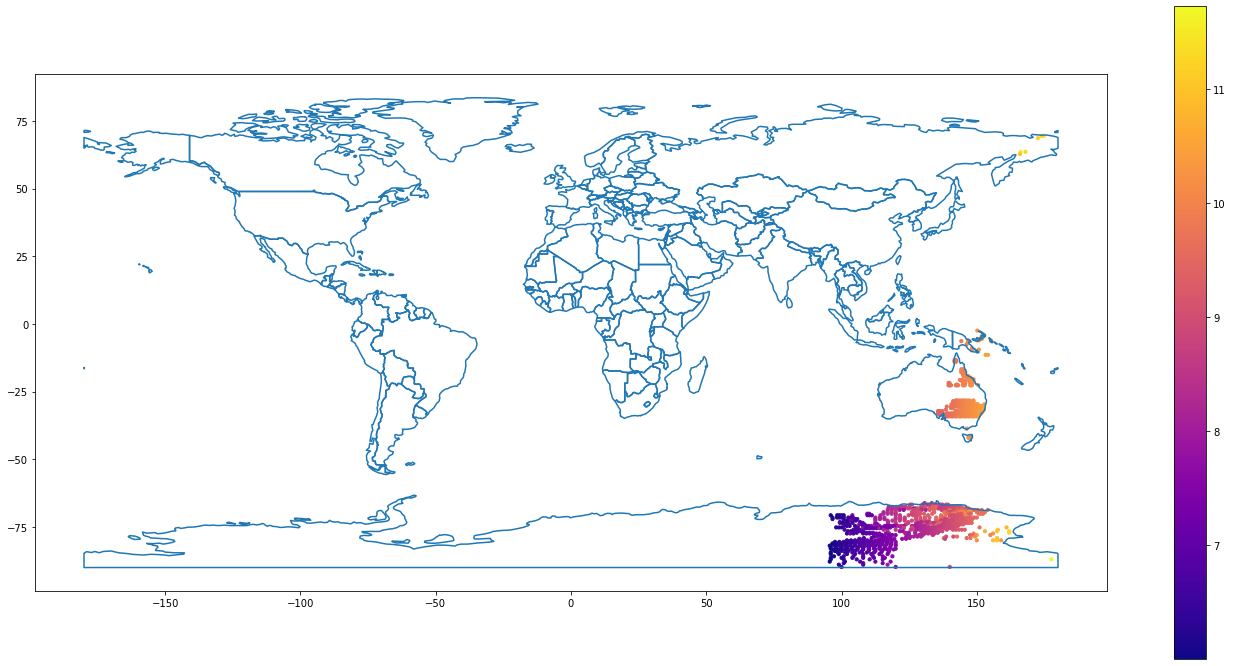

In [69]:
df = df_combined_matches
q = 'local_solar_time'
#Plot land outlines
ax=world.boundary.plot(figsize=(24,12))

#Create geopandas
geometry = [Point(xy) for xy in zip(df['x_ERA'], df['y_ERA'])]
gdf = GeoDataFrame(df, geometry=geometry)   

#Plot it
gdf.plot(ax=ax,column=q, cmap='plasma', legend=True,markersize=10)






# Appendix A - MODIS snapshots at each hour over 1 day

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20


/home/kimpson/miniconda3/envs/ML/lib/python3.8/site-packages/geopandas/plotting.py:387: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(figsize=figsize)


21
22
23


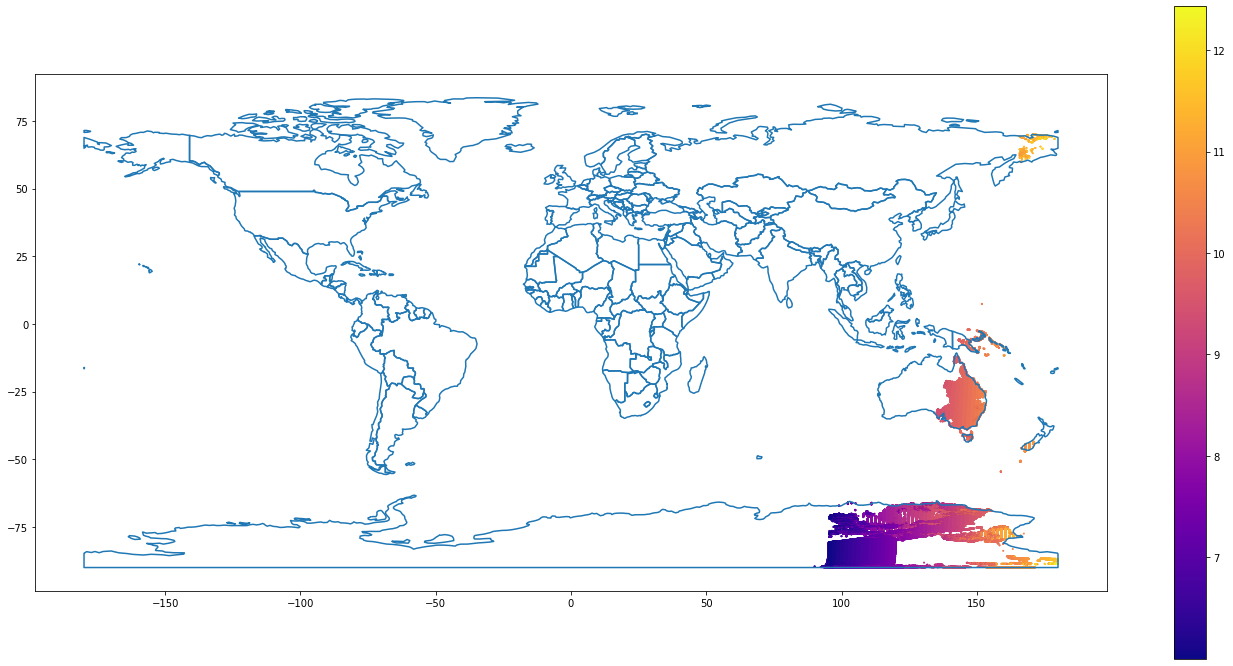

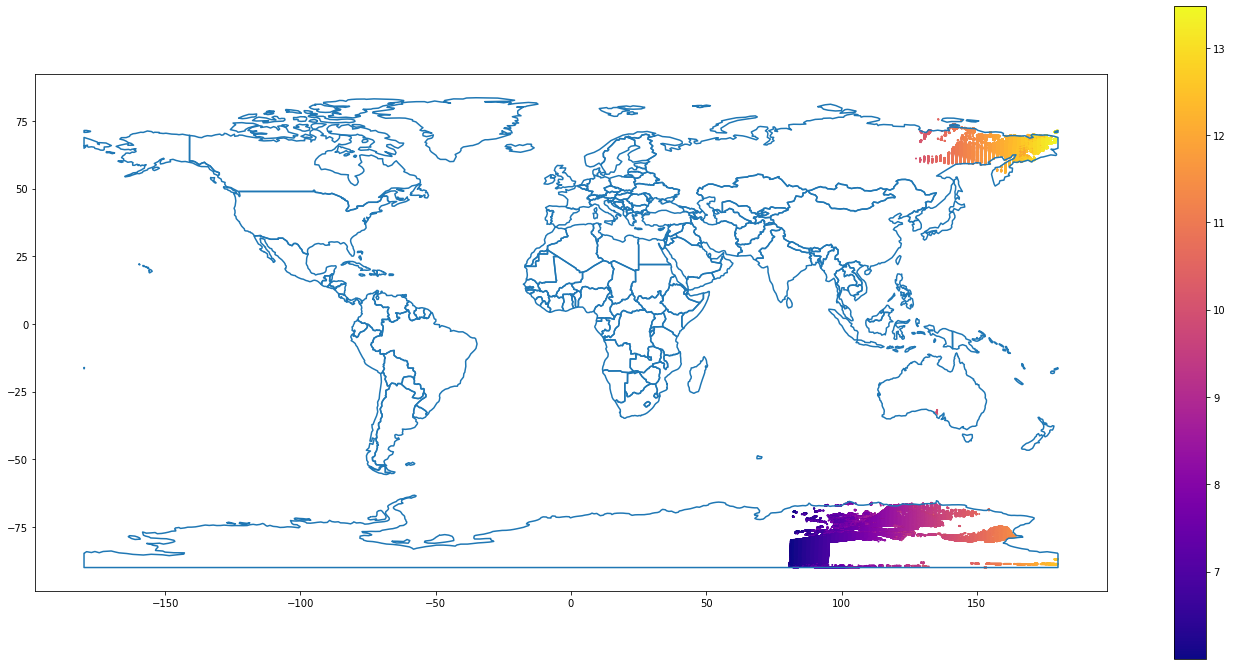

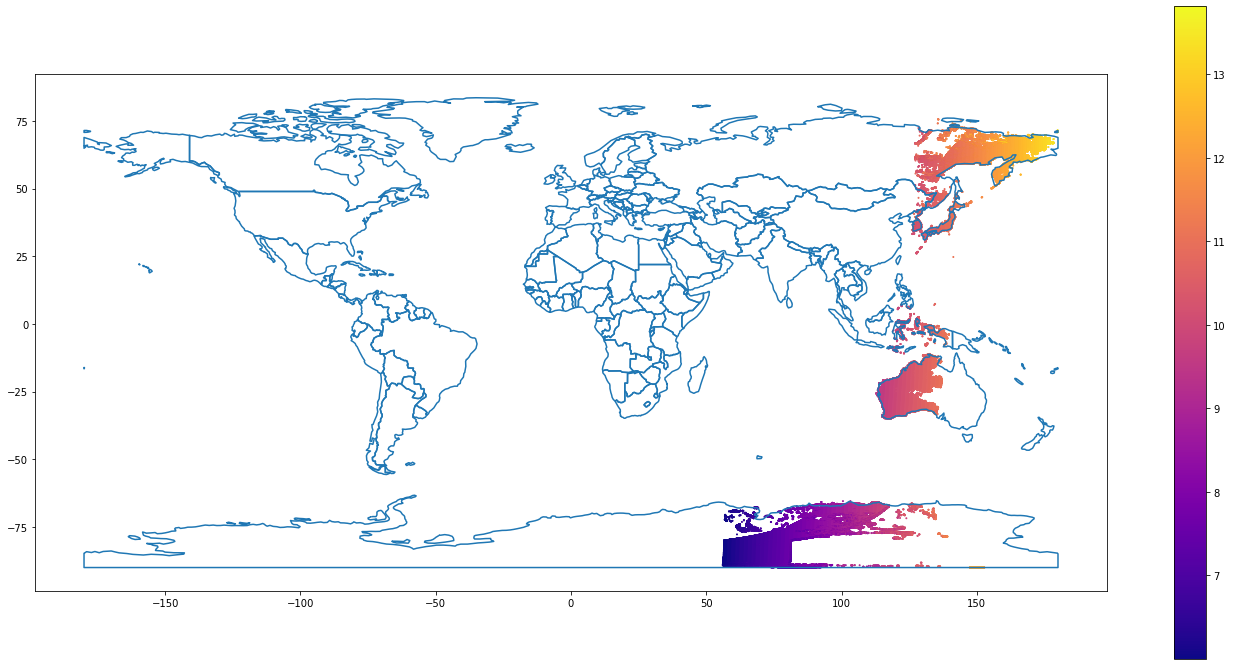

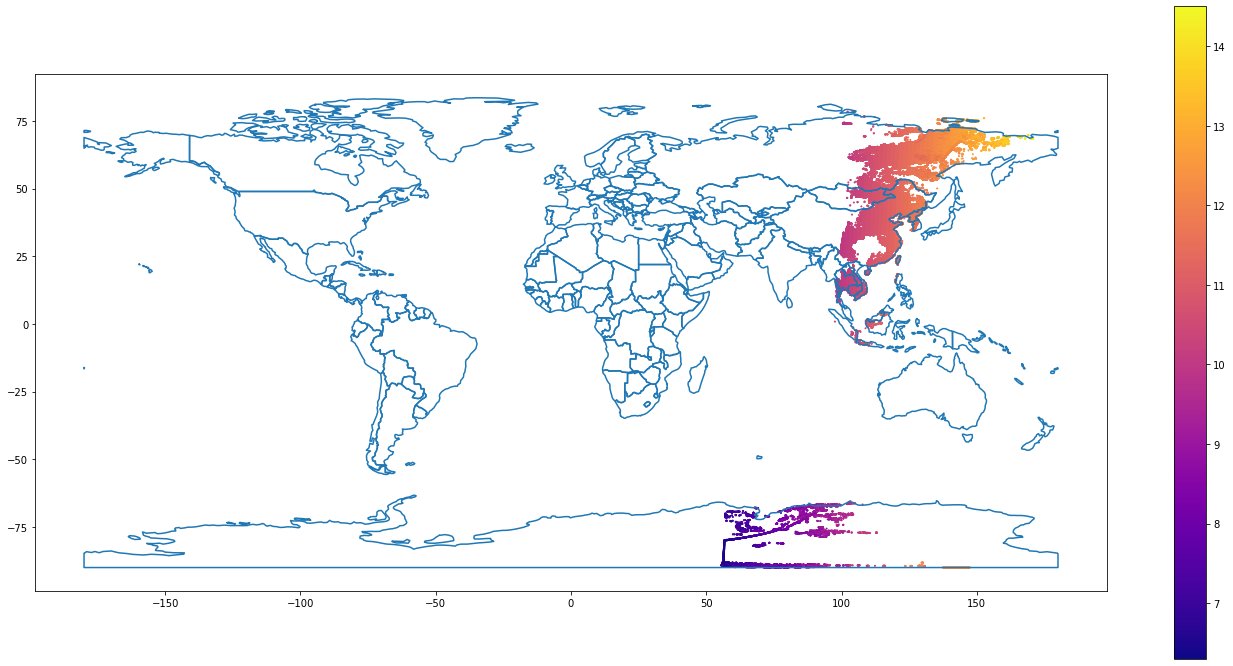

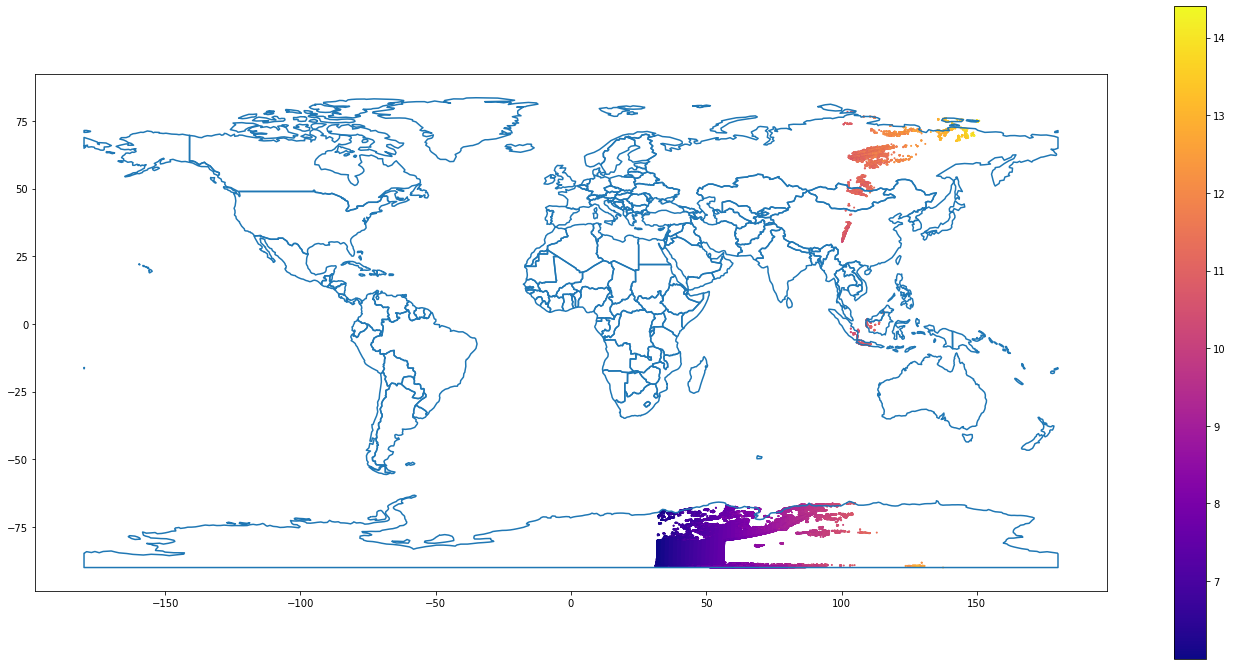

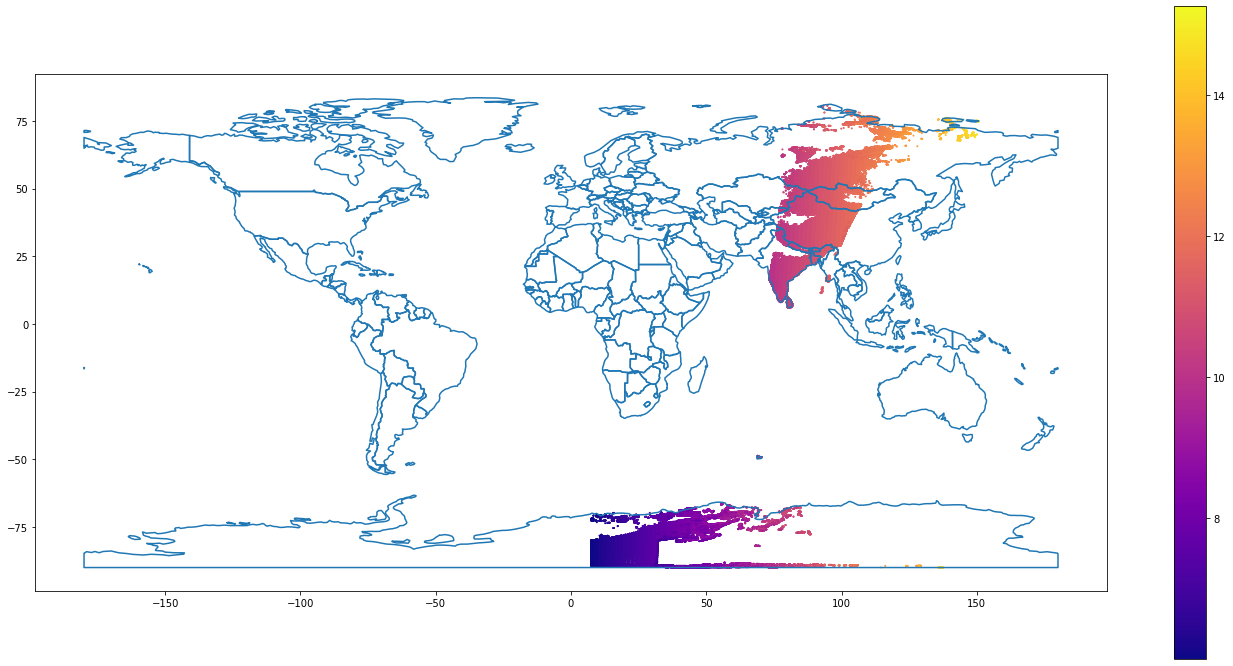

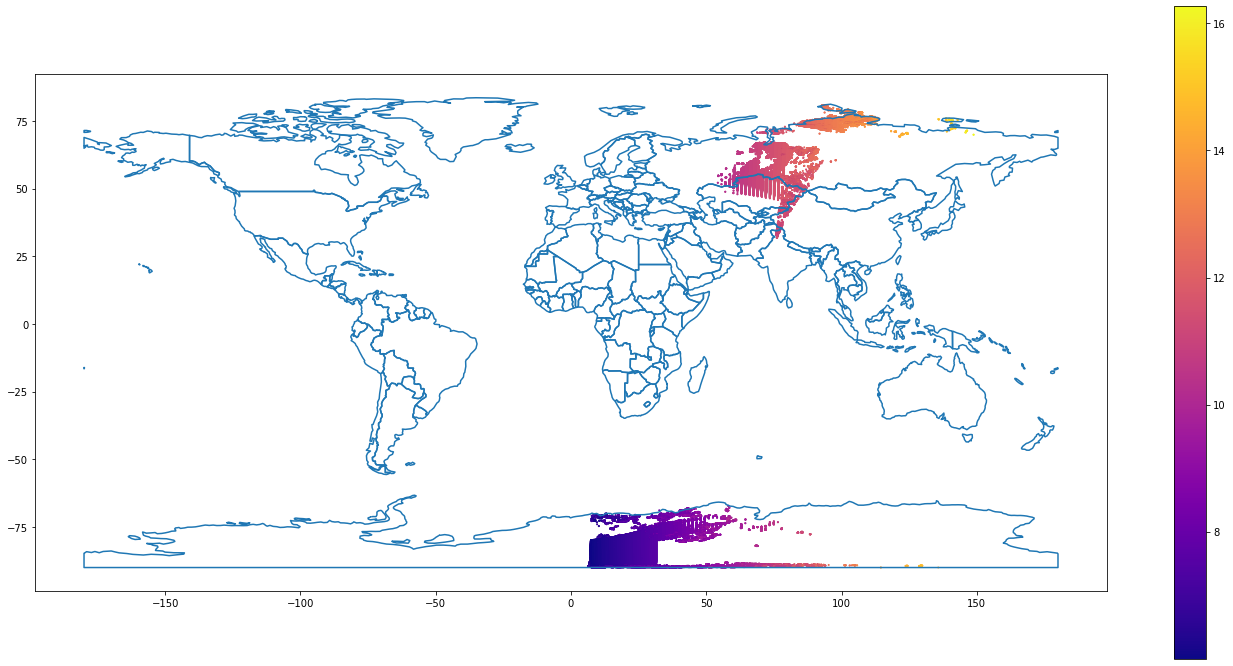

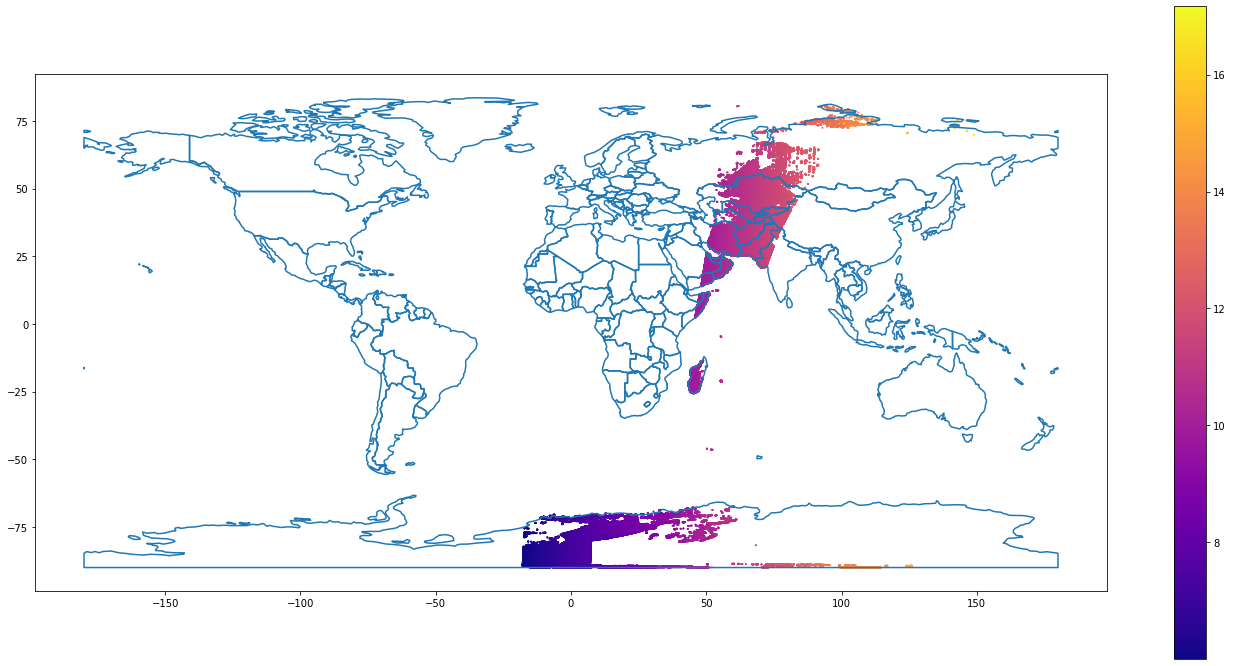

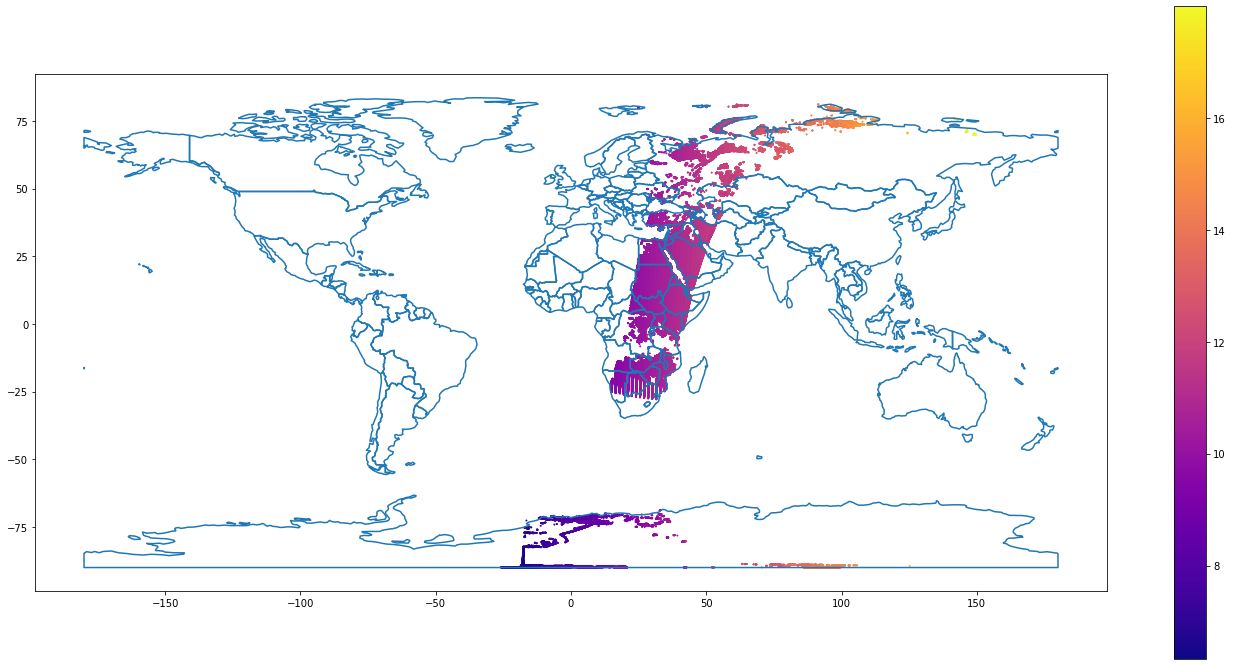

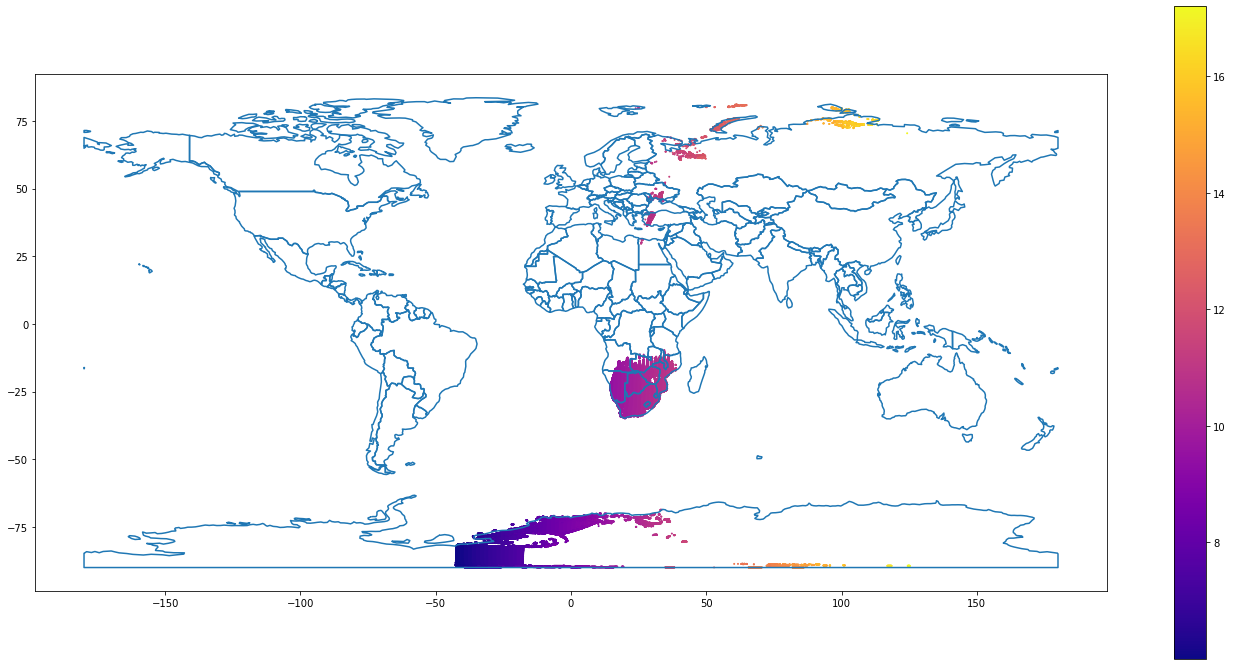

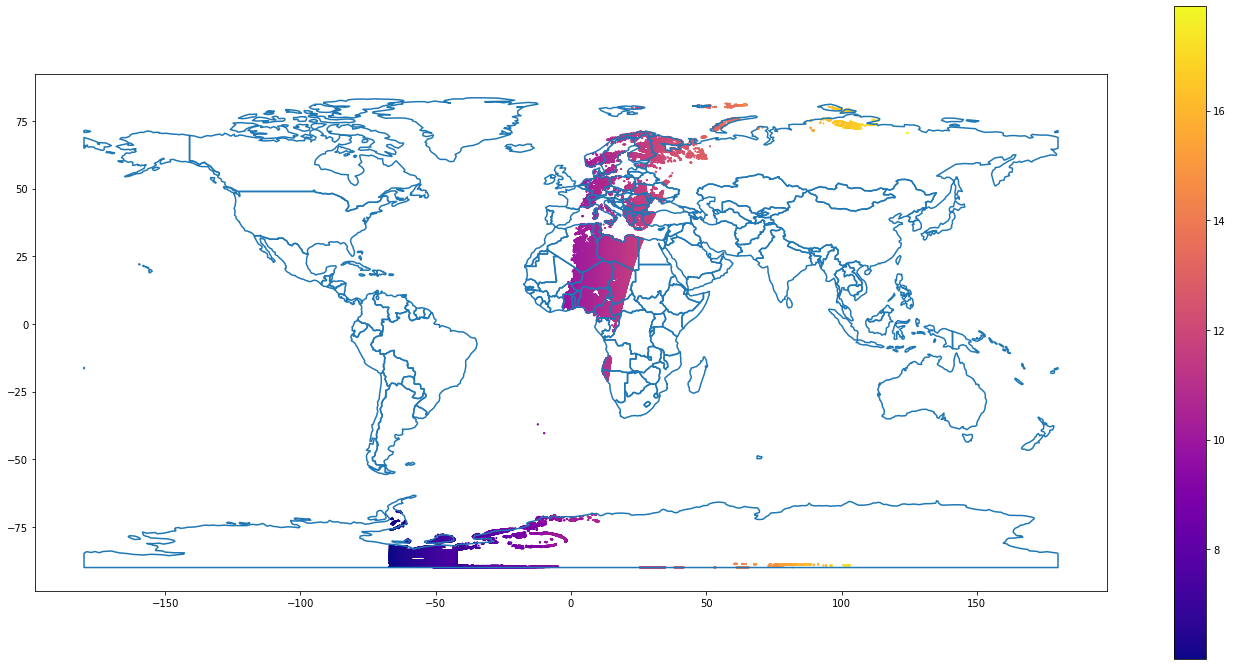

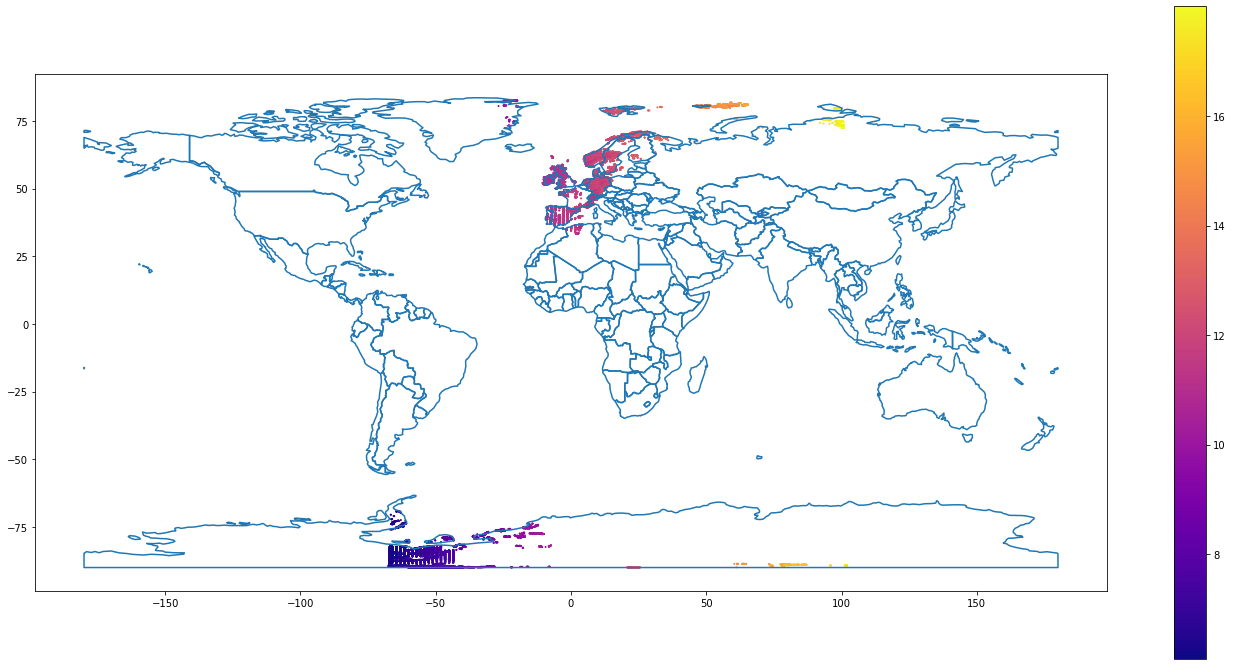

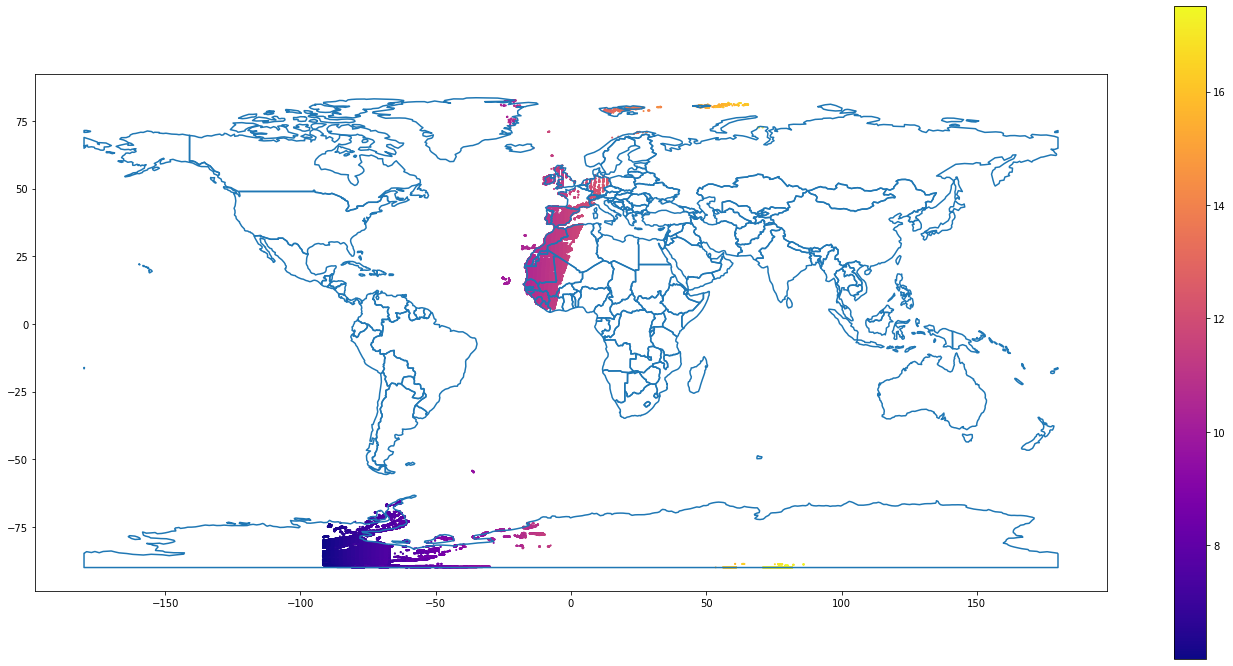

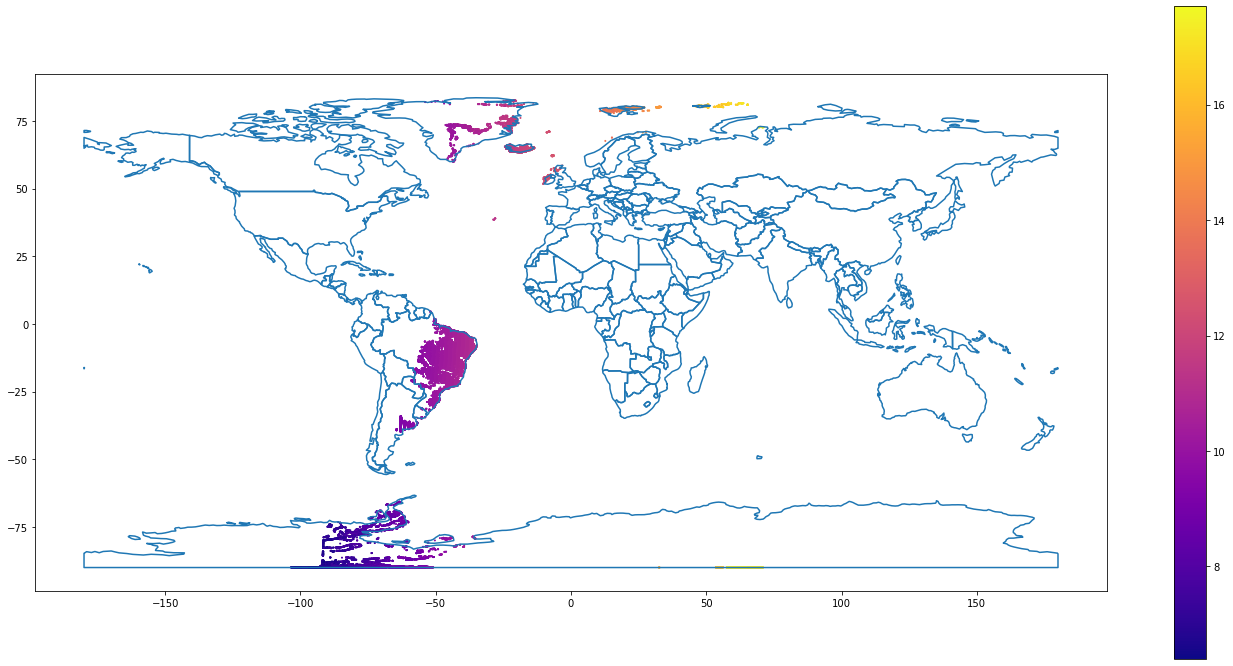

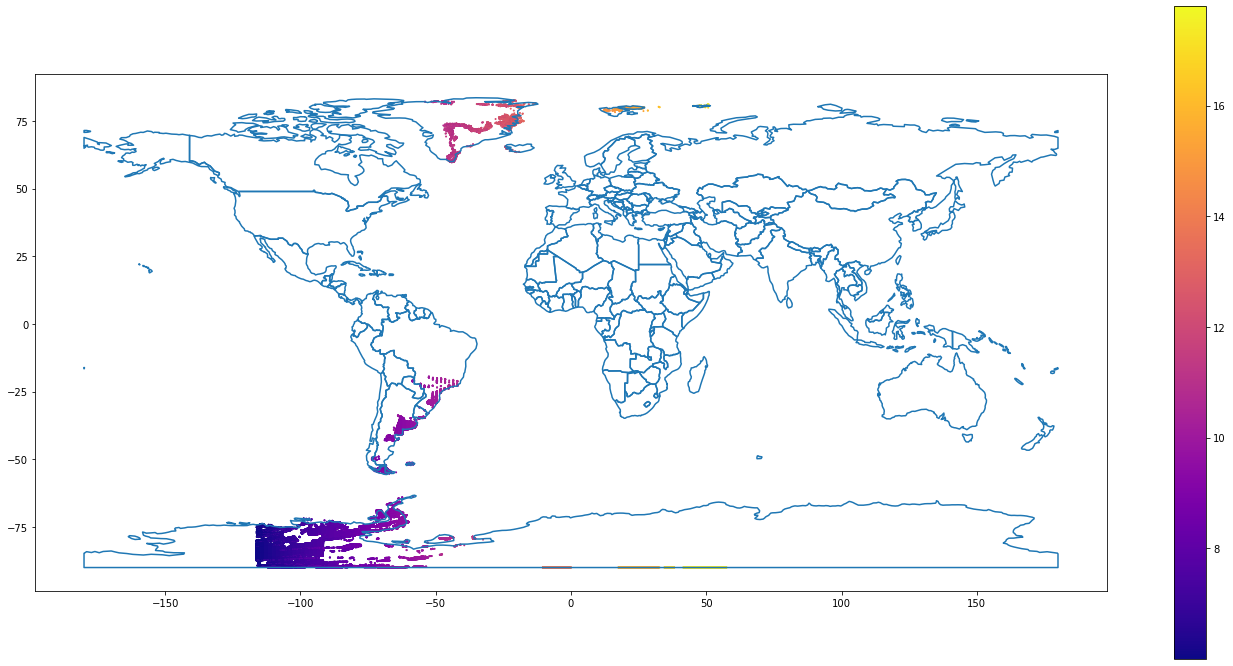

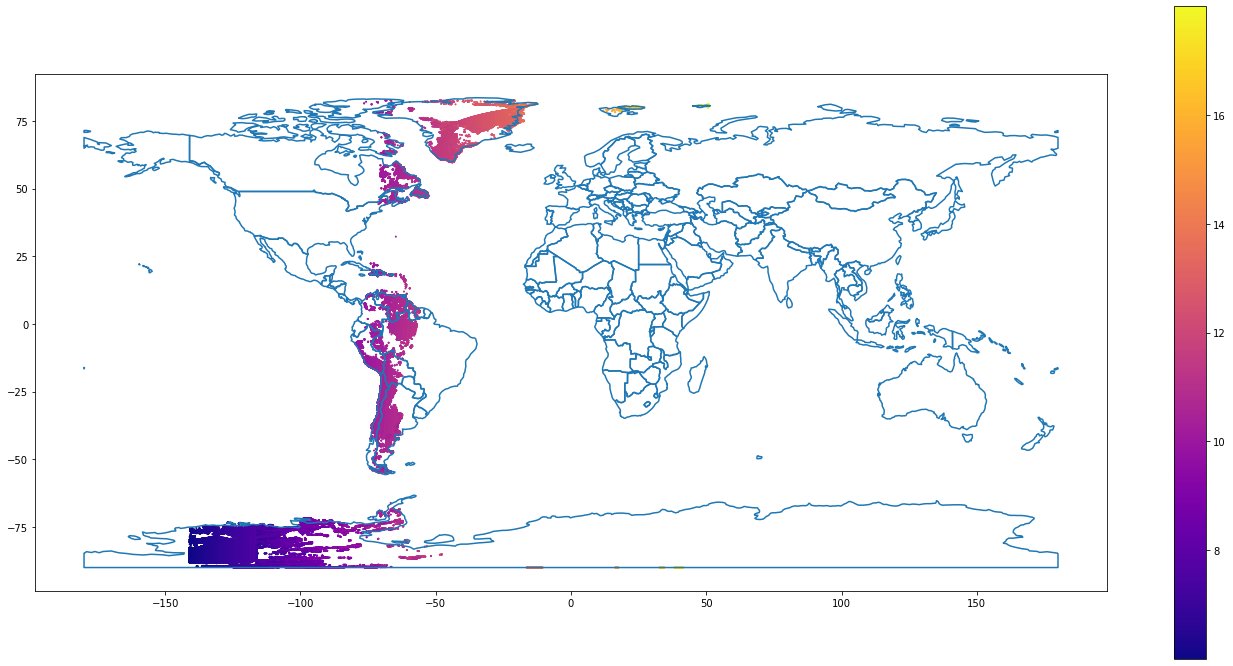

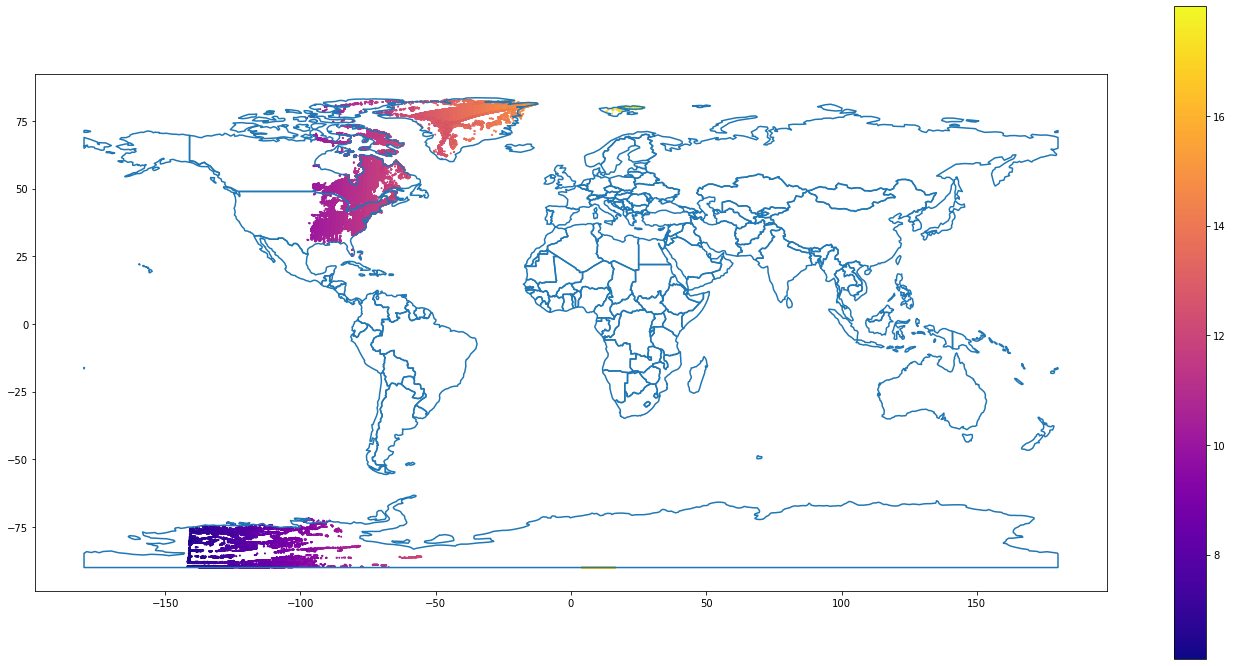

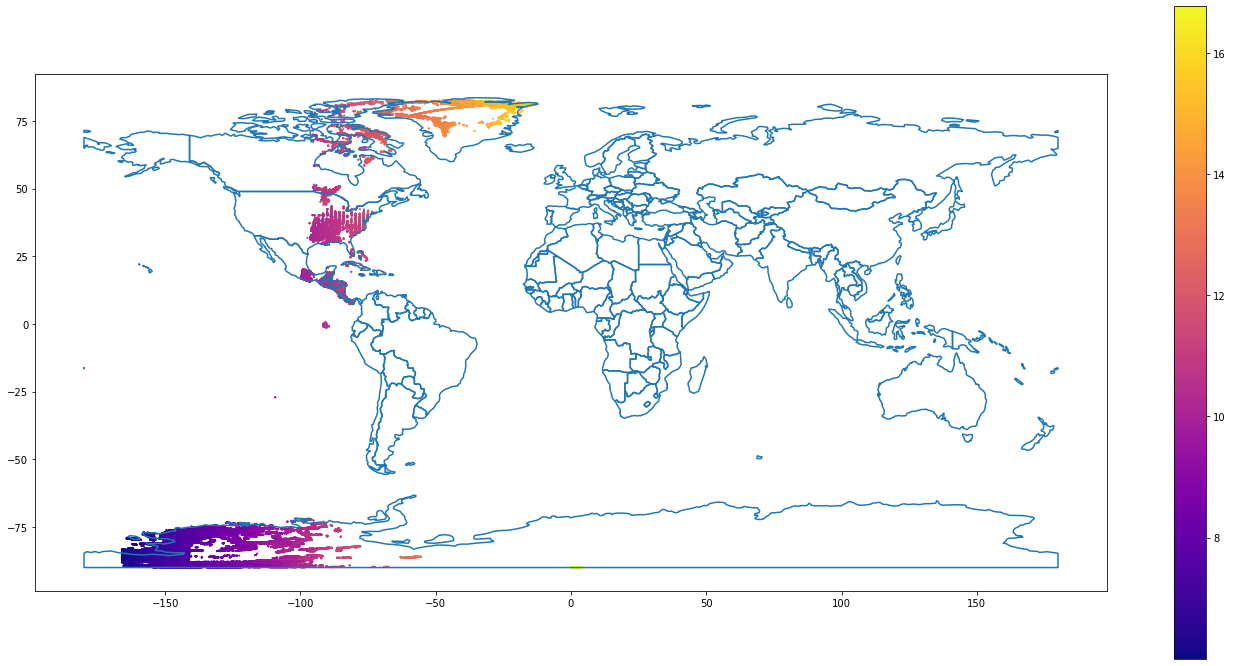

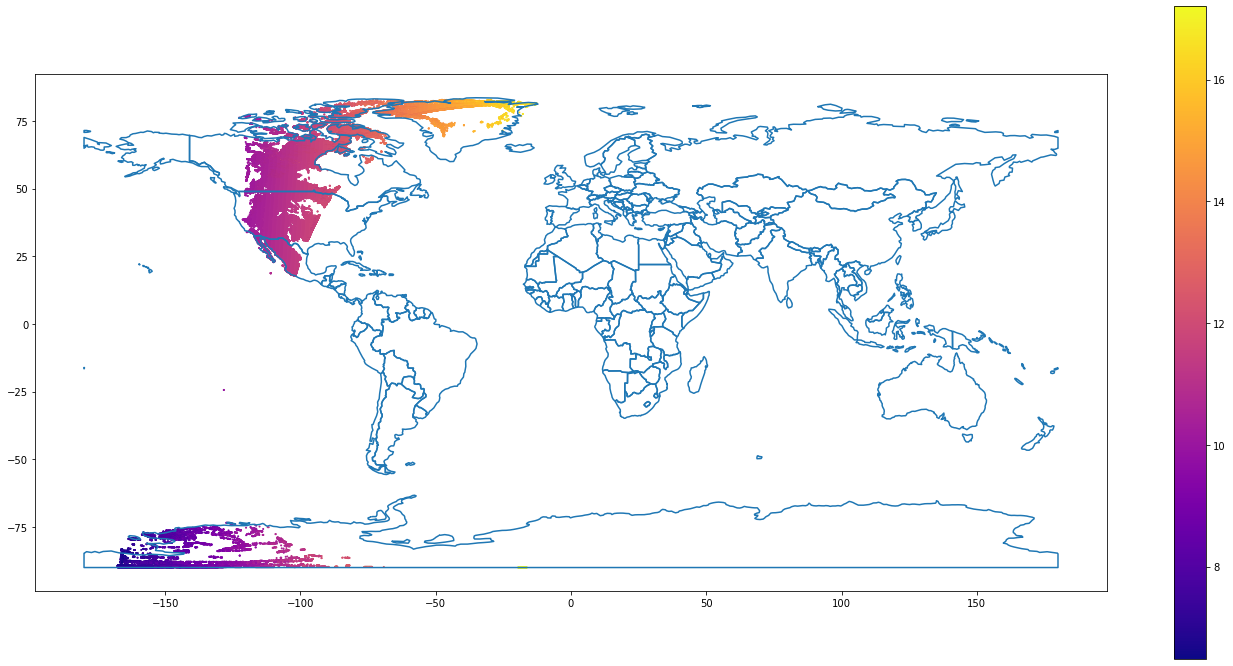

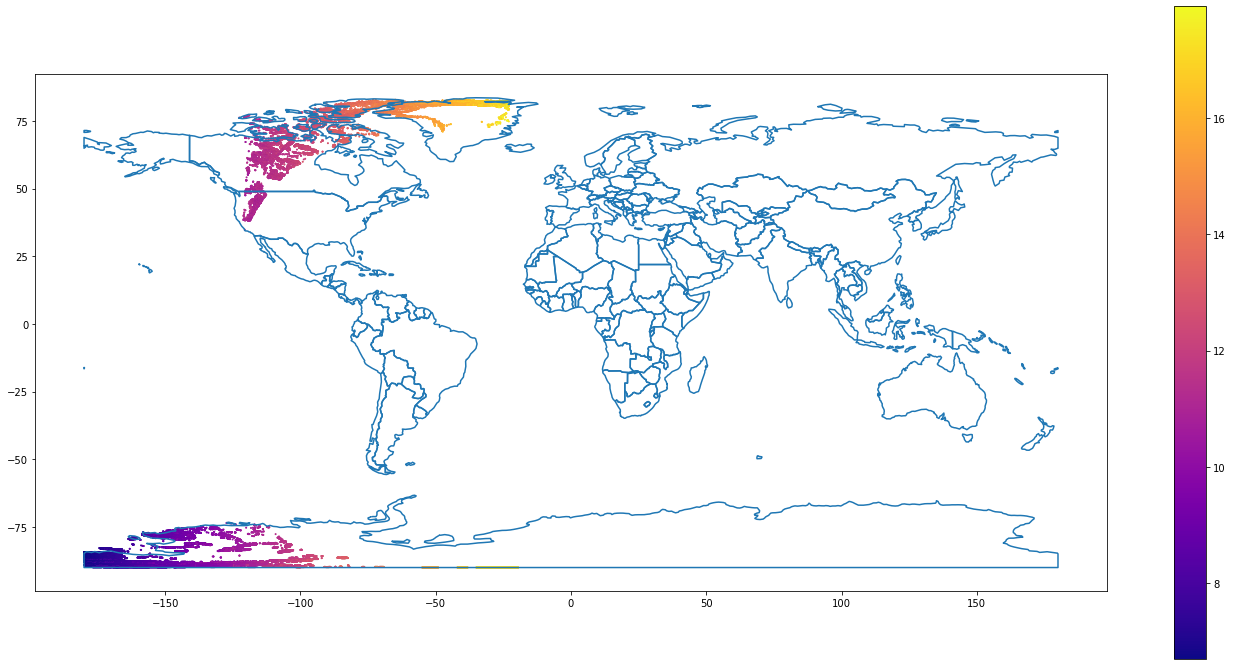

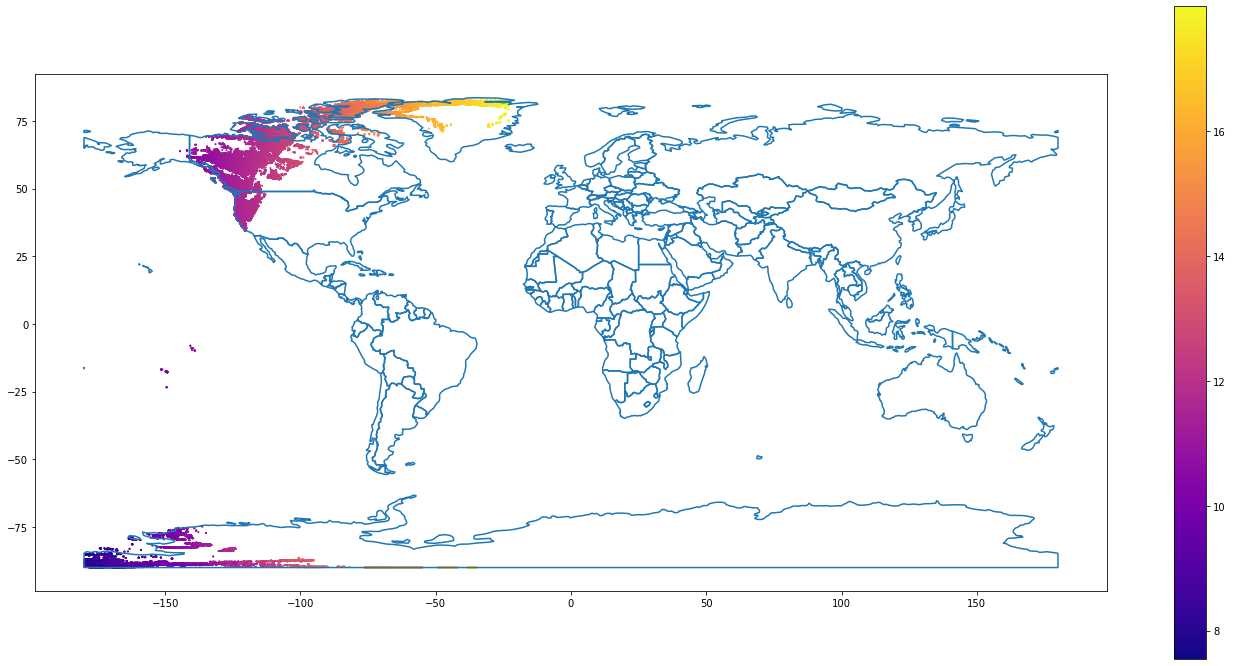

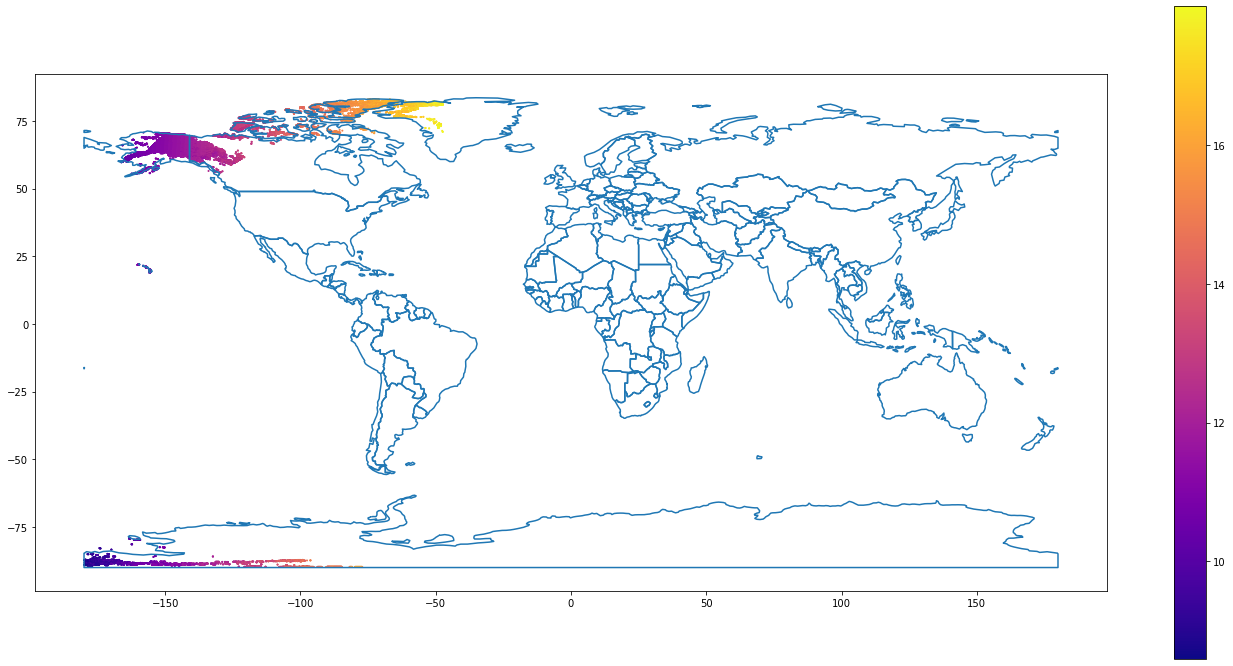

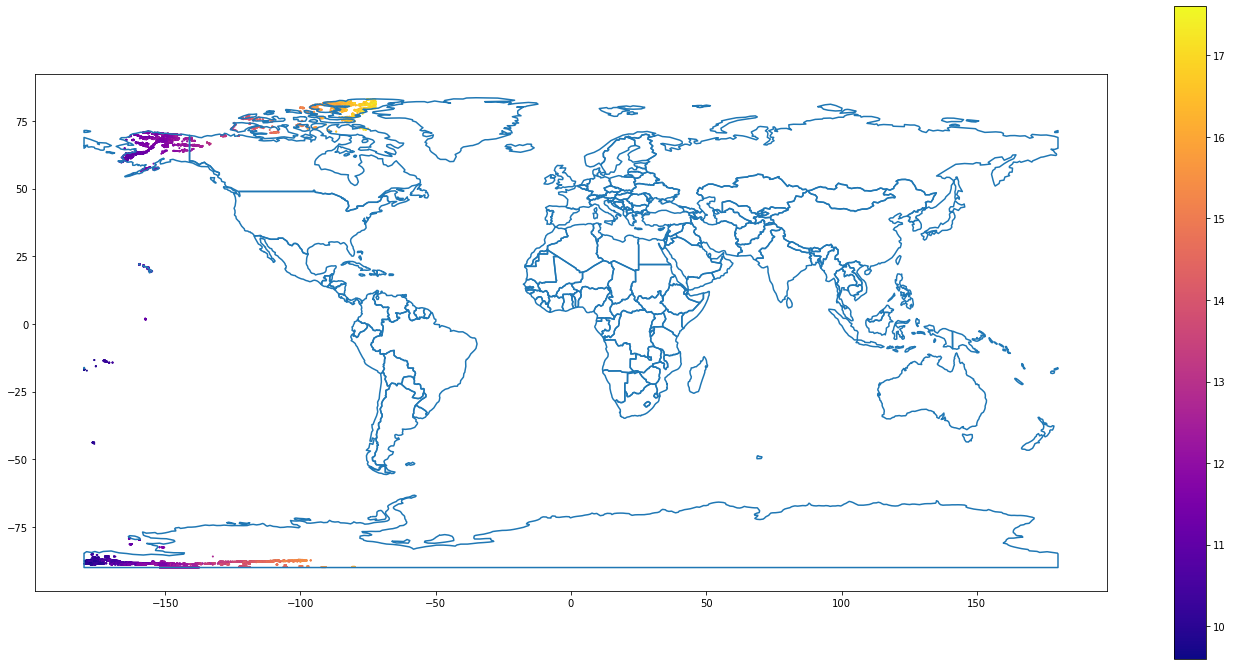

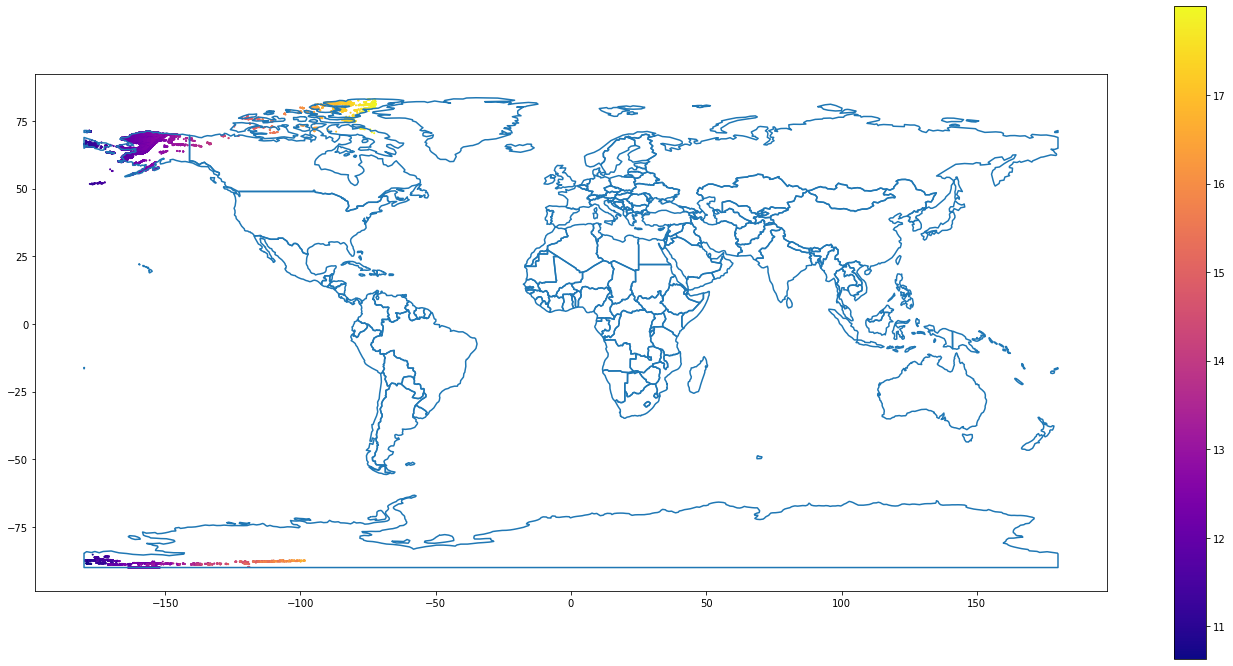

In [70]:
for i in range(len(dfs24_MODIS)):
    print(i)
    plot_world_map(dfs24_MODIS[i],'local_solar_time')

# Scratch space

---

In [88]:
def haversine_np(lon1, lat1, lon2, lat2):
    
    lon1, lat1, lon2, lat2 = map(np.radians, [lon1, lat1, lon2, lat2])

    dlon = lon2 - lon1
    dlat = lat2 - lat1

    a = np.sin(dlat/2.0)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2.0)**2

    c = 2 * np.arcsin(np.sqrt(a))
    km = 6367 * c
    return km

In [89]:
haversine_np(171.116667,70.05,174.0,69.55)

123.78902425712415